In [45]:
import numpy as np
import matplotlib.pyplot as plt

### Problem Setup

We have a 2-D dataset that have to categorize into three cluster

shape of a: (2, 150)
shape of b: (2, 150)
shape of c: (2, 150)
shape of c: (2, 150)
shape of x: (2, 600)


C:\Users\Dipankar Porey\AppData\Local\Temp\ipykernel_13240\302289173.py:7: RuntimeWarning: covariance is not positive-semidefinite.
  d = np.random.multivariate_normal([-2, 3], [[0, 1.5],[1.0, 0]], 150).T


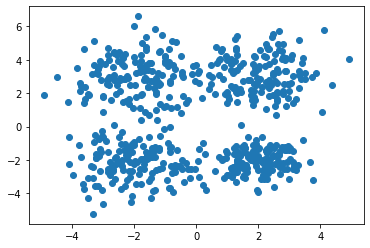

In [46]:
a = np.random.multivariate_normal([-2, -2], [[1.0, 0],[0, 1.0]], 150).T
print('shape of a:', a.shape)
b = np.random.multivariate_normal([2, -2],[[0.5, 0],[0, 0.5]], 150).T
print('shape of b:',b.shape)
c = np.random.multivariate_normal([2, 3], [[1.0, 0],[0, 1.5]], 150).T
print('shape of c:',c.shape)
d = np.random.multivariate_normal([-2, 3], [[0, 1.5],[1.0, 0]], 150).T
print('shape of c:',d.shape)

x = np.hstack((a,b,c,d))
print('shape of x:',x.shape)
plt.scatter(x[0],x[1])
plt.show()

$cost(x, k; \mu_1,\ldots, \mu_k)$ = $\sum_{i=1}^k \sum_{x \in c_i} d(x, \mu_i)$

### k-means implementation

In [47]:
def distance(u,v):
    '''Given two equal-length vectors, return their L2 distance.'''
    # return np.sum((u-v)**2)
    # print(np.array(u).shape)
    return np.linalg.norm(u-v)

def calculate_centroid(points):
    '''Given an array of points, returns their mean.'''
    return np.mean(points,axis=0)

def get_closest_cluster(point, centroids):
    '''Given point and current centroids, return the closest centroid of the point.'''
    closest_cluster=None
    min_distance= distance(point, centroids[0])# float('inf')
    for i, centroid in enumerate(centroids):
        if(distance(point,centroid)<=min_distance):
            mis_distance=distance(point, centroid)
            closest_cluster=i
    return closest_cluster
            

def k_means(points, k=3, max_iterations=100):
    '''Given an array of n points, assign each of them to one of k clusters.'''
    n = len(points)
    point_to_cluster = [0 for _ in range(n)] # [0]*n
    
    # Initialize the centroid
    # i referrs to centroid, j referrs to points
    # Pick the k random points use as initial centroid
    centroids = np.random.randint(low=0,high=n,size=k)
    cluster_to_centroid = points[centroids]
    
    # While not converged
    while max_iterations > 0:
        max_iterations -= 1
        
        # Map: i -> list of points j assigned to cluster i
        cluster_to_points = [[] for _ in range(k)]
        
        # Assign each point to its nearest centroid's cluster
        for j in range(n):
            i = get_closest_cluster(points[j], cluster_to_centroid)
            point_to_cluster[j]=i
            cluster_to_points[i].append(j)
        
        # Recalculate each centroid to cluster mean
        for i,point_i in enumerate(cluster_to_points):
            cluster_to_centroid[i]=calculate_centroid(points[point_i])
    
    # Return assignment
    return point_to_cluster

points = x.T
print("Shape of Points:- ",points.shape)
# print(points[:2])
print()

max_iterations = 2000
k=4
print("No. Of Iteration:- ",max_iterations)
print("Number Of Cluster:- ",k)
centroid_list = k_means(points ,k = k, max_iterations = max_iterations)

print("Centroid List:- \n",centroid_list)


Shape of Points:-  (600, 2)

No. Of Iteration:-  2000
Number Of Cluster:-  4
Centroid List:- 
 [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2

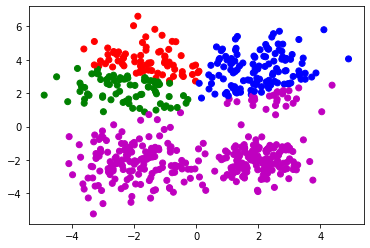

In [49]:
colormap=np.array(['r','g','b','m'])
plt.scatter(x[0], x[1],c=colormap[centroid_list])
plt.show()

                                                        -: END :-